In [1]:
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


A general strategy for solving the Riemann problem for the exact soln of SWE is as follows (after LeVeque):
- determine whether the 1-wave and 2-wave are shock or rarefaction waves;
- determine the intermediate star state q∗ between the two waves;
- determine the location of shocks via shock speed and the head and tail of the rarefaction waves via the characteristic speeds;
- determine the structure of the solution through any rarefaction wave.

#### Dam break problem
Consider an initial height and  velocity field given by the equations below

\begin{equation*}
h(x,0) = \left\{\begin{array}{rr} 
2 & x < 0 \\
1 & x >= 0\\
\end{array}
\right.
\end{equation*}

\begin{equation*}
u(x,0) = \left\{\begin{array}{rr} 
0 & x < 0 \\
0 & x >= 0\\
\end{array}
\right.
\end{equation*}

Set $g = 1$  


In [2]:
#All rarefaction 
'''hl = 1
hr = 1
ul = -0.5
ur = 0.5'''

#dam break 
'''hl = 2
hr = 1
ul = 0
ur = 0'''

#All shock 
hl = 1
hr = 1
ul = 0.5
ur = -0.5



In [3]:
g = 1
#intial data
ql = array([hl,hl*ul])
qr = array([hr,hr*ur])


In [4]:
from exact_r import *

#rarefaction solution
hmr,umr = rare(ql,qr,g)

#shock solution
hms,ums = newton(ql,qr,g)

#intermediate states
qmr = array([hmr,hmr*umr])
qms = array([hms,hms*ums])

In [5]:
if hr == 0:
    hmr = 0
    umr = ul + 2*sqrt(g*hl)
elif hl == 0:
    hmr = 0
    umr = ur - 2*sqrt(g*hr)
else:
    #rarefaction solution
    hmr,umr = rare(ql,qr,g)

shock_speed = sr(hms,qr,g)

laml = lam1(hl,ul,g)
lamr = lam1(hmr,umr,g)


In [6]:
'''hl = hms
hr = 1
ul = ums
ur = -0.5'''


'hl = hms\nhr = 1\nul = ums\nur = -0.5'

In [7]:
'''
#left going shock
hl = 1.4561642461359086
hr = 1
ul = 0.287686446696914
ur = 0

#right going shock
hl = 1.5513875245483204
hr = 1
ul = 0.0
ur = -0.5

#right going rarefaction
hl = 0.5625
hr = 1
ul = 0
ur = 0.5

#left going rarefaction
hl = 2
hr = 1.4571067811865475
ul = 0
ur = 0.41421356237309537
'''

'\n#left going shock\nhl = 1.4561642461359086\nhr = 1\nul = 0.287686446696914\nur = 0\n\n#right going shock\nhl = 1.5513875245483204\nhr = 1\nul = 0.0\nur = -0.5\n\n#right going rarefaction\nhl = 0.5625\nhr = 1\nul = 0\nur = 0.5\n\n#left going rarefaction\nhl = 2\nhr = 1.4571067811865475\nul = 0\nur = 0.41421356237309537\n'

In [8]:
# Spatial domain
ax = -6
bx = 6
ay = -2
by = 3
meqn = 2  # Number of equations in the system

# Gravity
g = 1

# Temporal domain
to = 0
Tfinal = 2

#intial data
ql = array([hl,hl*ul])
qr = array([hr,hr*ur])

N = 100
nsteps = 30
t = linspace(to,Tfinal,nsteps)
x = linspace(ax,bx,N+1)

<IPython.core.display.Javascript object>


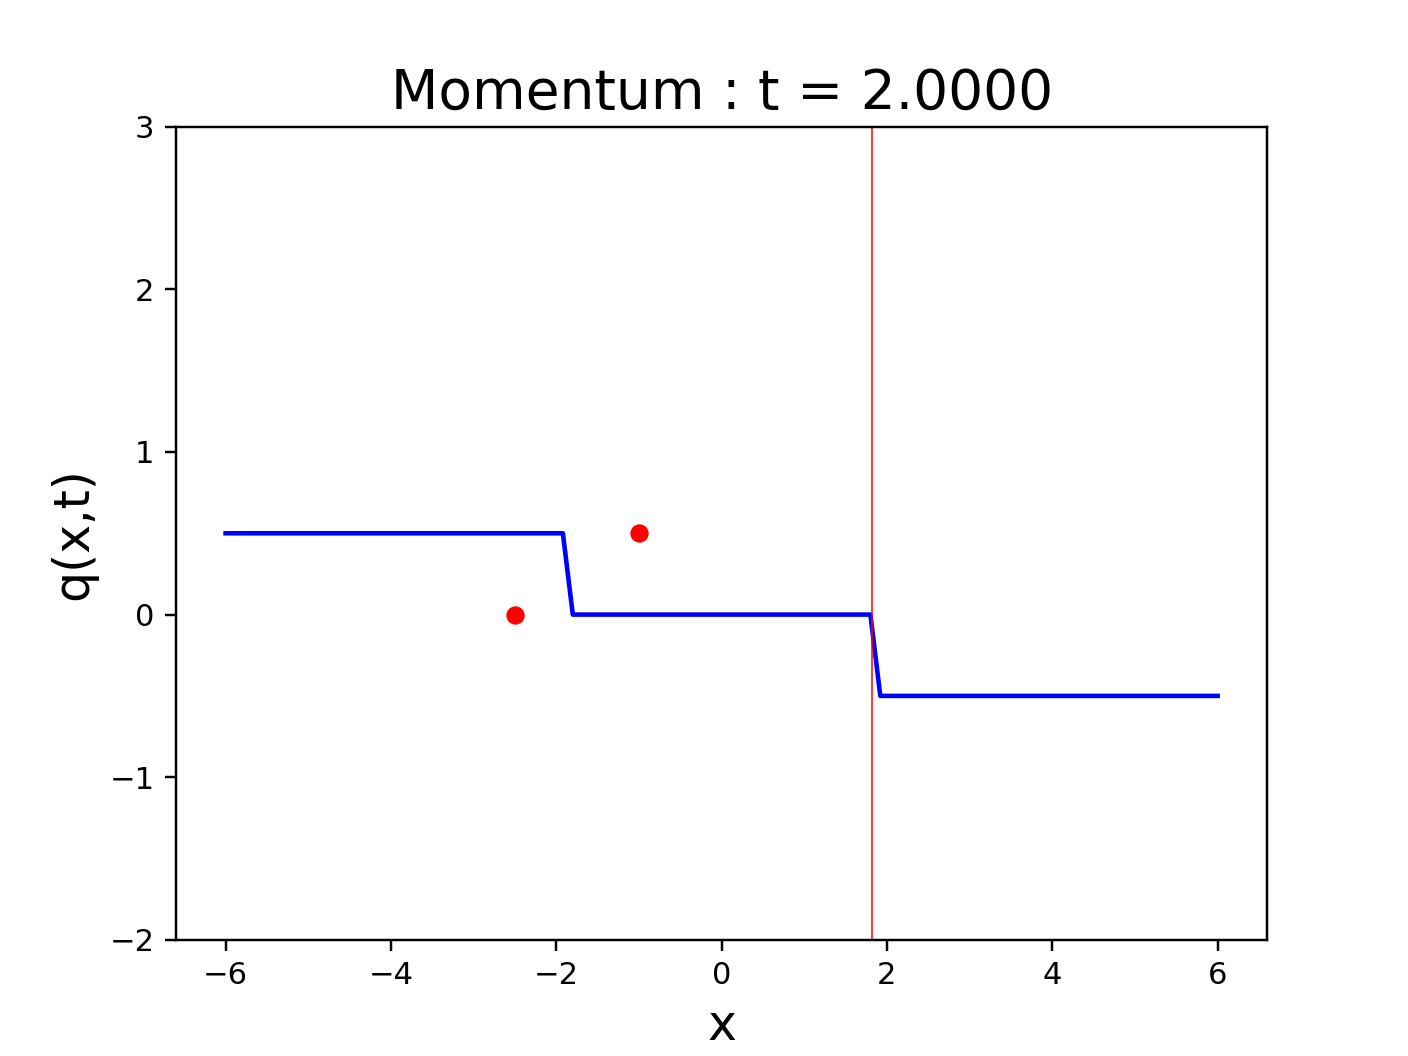

In [9]:
fig = figure(2)
clf()

# mq = 0 : Height field
# mq = 1 : Momentum field

mq = 1

q0 = qexact(x,to,mq,ql,qr,g)

hdl, = plot(x,q0,'b-',markersize=5)

if mq == 0:
    tstr = 'Height : t = {:.4f}'
    rare_speed, = plot([0,0],[hl,hmr],'r.',markersize = 10)
else:
    tstr = 'Momentum : t = {:.4f}'
    rare_speed, = plot([0,0],[hl*ul,hmr*umr],'r.',markersize = 10)

htitle = title(tstr.format(0),fontsize=18)

shdl, = plot([0,0],[ay,by],'r-',linewidth=0.5)

#time loop
for n in range(nsteps):
    
    q = qexact(x,t[n],mq,ql,qr,g)
    
    hdl.set_ydata(q)
    
    shdl.set_xdata([shock_speed*t[n],shock_speed*t[n]])
    
    rare_speed.set_xdata([t[n]*laml,t[n]*lamr])
    
    xlabel('x',fontsize=16)
    ylabel('q(x,t)',fontsize=16)
    htitle.set_text(tstr.format(t[n]))
    
    ylim([ay,by])
    pause(0.1)

    fig.canvas.draw()